# Cyber Security-Capstone Project-Binominal-Multinominal-Classifaction

## Importing Necessary Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pf
import statsmodels.formula.api as smf
import dtale as dt
import imblearn.over_sampling as over_sampling
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBClassifier, XGBRegressor
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [2]:
%cd "C:\Users\Asus1\Desktop\case studies\cyber case study"

C:\Users\Asus1\Desktop\case studies\cyber case study


## Data Preparation

In [17]:
a=pd.read_csv("Data_of_Attack_Back.csv")
b=pd.read_csv("Data_of_Attack_Back_FTPWrite.csv",names=['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate'])

c=pd.read_csv("Data_of_Attack_Back_BufferOverflow.csv")
d=pd.read_csv("Data_of_Attack_Back_GuessPassword.csv")
e=pd.read_csv("Data_of_Attack_Back_Neptune.csv")
f=pd.read_csv("Data_of_Attack_Back_NMap.csv")
g=pd.read_csv("Data_of_Attack_Back_Normal.csv")
h=pd.read_csv("Data_of_Attack_Back_PortSweep.csv")
i=pd.read_csv("Data_of_Attack_Back_RootKit.csv")
j=pd.read_csv("Data_of_Attack_Back_Satan.csv")
k=pd.read_csv("Data_of_Attack_Back_Smurf.csv")

# Data Manipulation

In [26]:
a["attack"]="back"
b["attack"]="Back_FTPWrite"
c["attack"]="BufferOverflow"
d["attack"]="GuessPassword"
e["attack"]="Neptune"
f["attack"]="NMap"
g["attack"]="Normal"
h["attack"]="PortSweep"
i["attack"]="RootKit"
j["attack"]="Satan"
k["attack"]="Smurf"

In [27]:
final=pd.concat([a,b,c,d,e,f,g,h,i,j,k])

In [29]:
final.columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_error_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate','attack']

In [30]:
final["binary_flag"]=np.where(final["attack"]=="Normal",0,1)

In [ ]:
#Detailed profiling using dtale
ab=dt.show(final)
ab.open_browser()

C:\Users\Asus1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='service'>

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


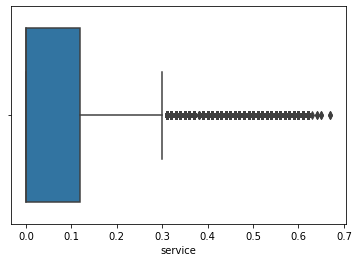

In [31]:
#boxplot pre outlier treatment
sns.boxplot(final.service)

In [32]:
# performing outlier treatment
def outlier_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else:
        x
    return x

In [33]:
final= final.apply(outlier_var)

C:\Users\Asus1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='service'>

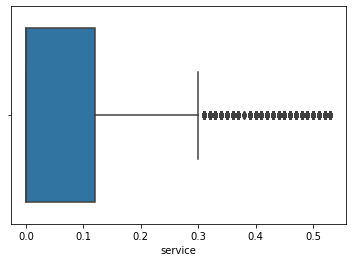

In [34]:
#boxplot post outlier treatment
sns.boxplot(final.service)

# EDA(Exploratory Data Analysis)

In [35]:
# varible eliminated using dtale
final_x_y=final[["flag","serror_rate","srv_rerror_rate","same_srv_rate","dst_host_srv_count","dst_host_same_srv_rate","dst_host_serror_rate","dst_host_srv_rerror_rate","diff_srv_rate","binary_flag"]]
x=final[["flag","serror_rate","srv_rerror_rate","same_srv_rate","dst_host_srv_count","dst_host_same_srv_rate","dst_host_serror_rate","dst_host_srv_rerror_rate","diff_srv_rate"]]
y=final["binary_flag"]

<AxesSubplot:>

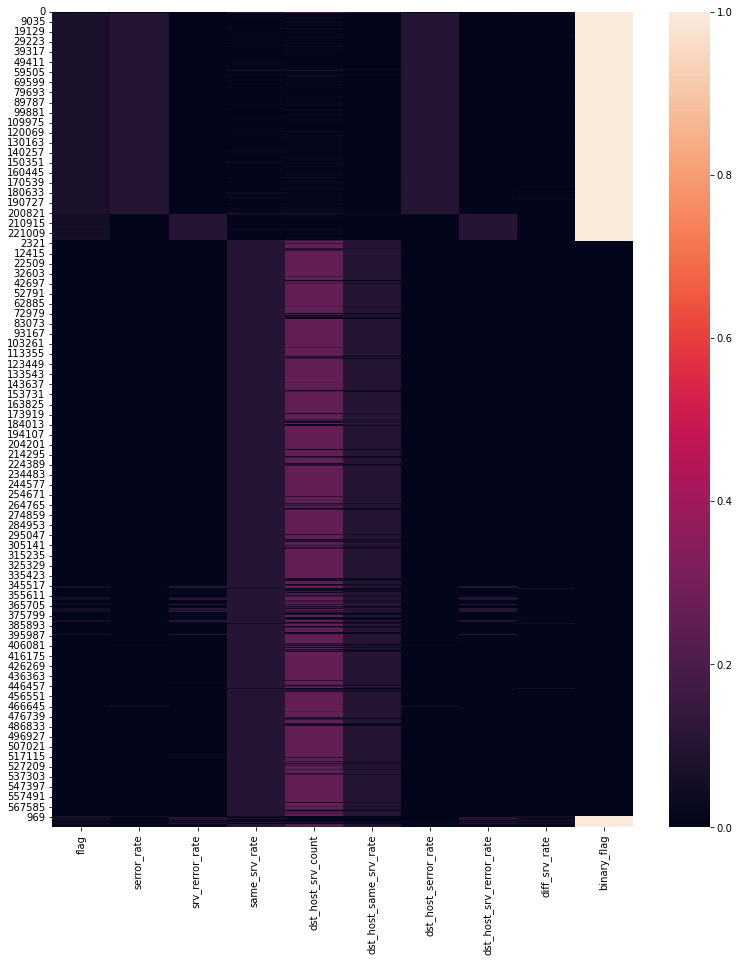

In [36]:
plt.figure(figsize=[13,15])
sns.heatmap(final_x_y)

In [37]:
#balancing the data
sm = over_sampling.SMOTE(random_state=123)
x, y = sm.fit_resample(x,y)

In [38]:
print(x.shape)
print(y.shape)

(1153420, 9)
(1153420,)


In [39]:
y=y.sample(frac=.01)
x=x.loc[y.index]

In [40]:
print(x.shape)
print(y.shape)

(11534, 9)
(11534,)


## decision tree

In [41]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1234)

In [42]:
param_grid = {'max_features': [4,5,6,7,8], 'max_depth':[3,4,5,6,7,8],'max_leaf_nodes':[10,12,14,15,17,20,21,23]}


In [43]:
model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc')
model.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [4, 5, 6, 7, 8],
                         'max_leaf_nodes': [10, 12, 14, 15, 17, 20, 21, 23]},
             scoring='roc_auc')

In [44]:
model.best_params_

{'max_depth': 6, 'max_features': 6, 'max_leaf_nodes': 20}

In [45]:
model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=23,max_features=7)
xy=model.fit(train_x, train_y)

In [46]:
pred_prob_train = pd.DataFrame(model.predict_proba(train_x))[1]
metrics.roc_auc_score(train_y, pred_prob_train)

0.9964419025482217

In [47]:
pred_prob_test = pd.DataFrame(model.predict_proba(test_x))[1]
metrics.roc_auc_score(test_y, pred_prob_test)

0.9904401255593401

In [48]:
print(metrics.classification_report(train_y, model.predict(train_x)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4094
           1       1.00      0.98      0.99      3979

    accuracy                           0.99      8073
   macro avg       0.99      0.99      0.99      8073
weighted avg       0.99      0.99      0.99      8073



In [49]:
print(metrics.classification_report(test_y, model.predict(test_x)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1725
           1       1.00      0.98      0.99      1736

    accuracy                           0.99      3461
   macro avg       0.99      0.99      0.99      3461
weighted avg       0.99      0.99      0.99      3461



In [50]:
text_=tree.export_text(model)
print(text_)

|--- feature_0 <= 0.03
|   |--- feature_3 <= 0.03
|   |   |--- feature_4 <= 0.01
|   |   |   |--- class: 1
|   |   |--- feature_4 >  0.01
|   |   |   |--- feature_3 <= 0.03
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.03
|   |   |   |   |--- class: 1
|   |--- feature_3 >  0.03
|   |   |--- feature_3 <= 0.09
|   |   |   |--- feature_8 <= 0.03
|   |   |   |   |--- feature_8 <= 0.01
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_8 >  0.01
|   |   |   |   |   |--- feature_3 <= 0.07
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  0.07
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_8 >  0.03
|   |   |   |   |--- class: 0
|   |   |--- feature_3 >  0.09
|   |   |   |--- feature_4 <= 0.21
|   |   |   |   |--- feature_5 <= 0.10
|   |   |   |   |   |--- feature_5 <= 0.00
|   |   |   |   |   |   |--- feature_4 <= 0.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  0.00
|   |   |   |   

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


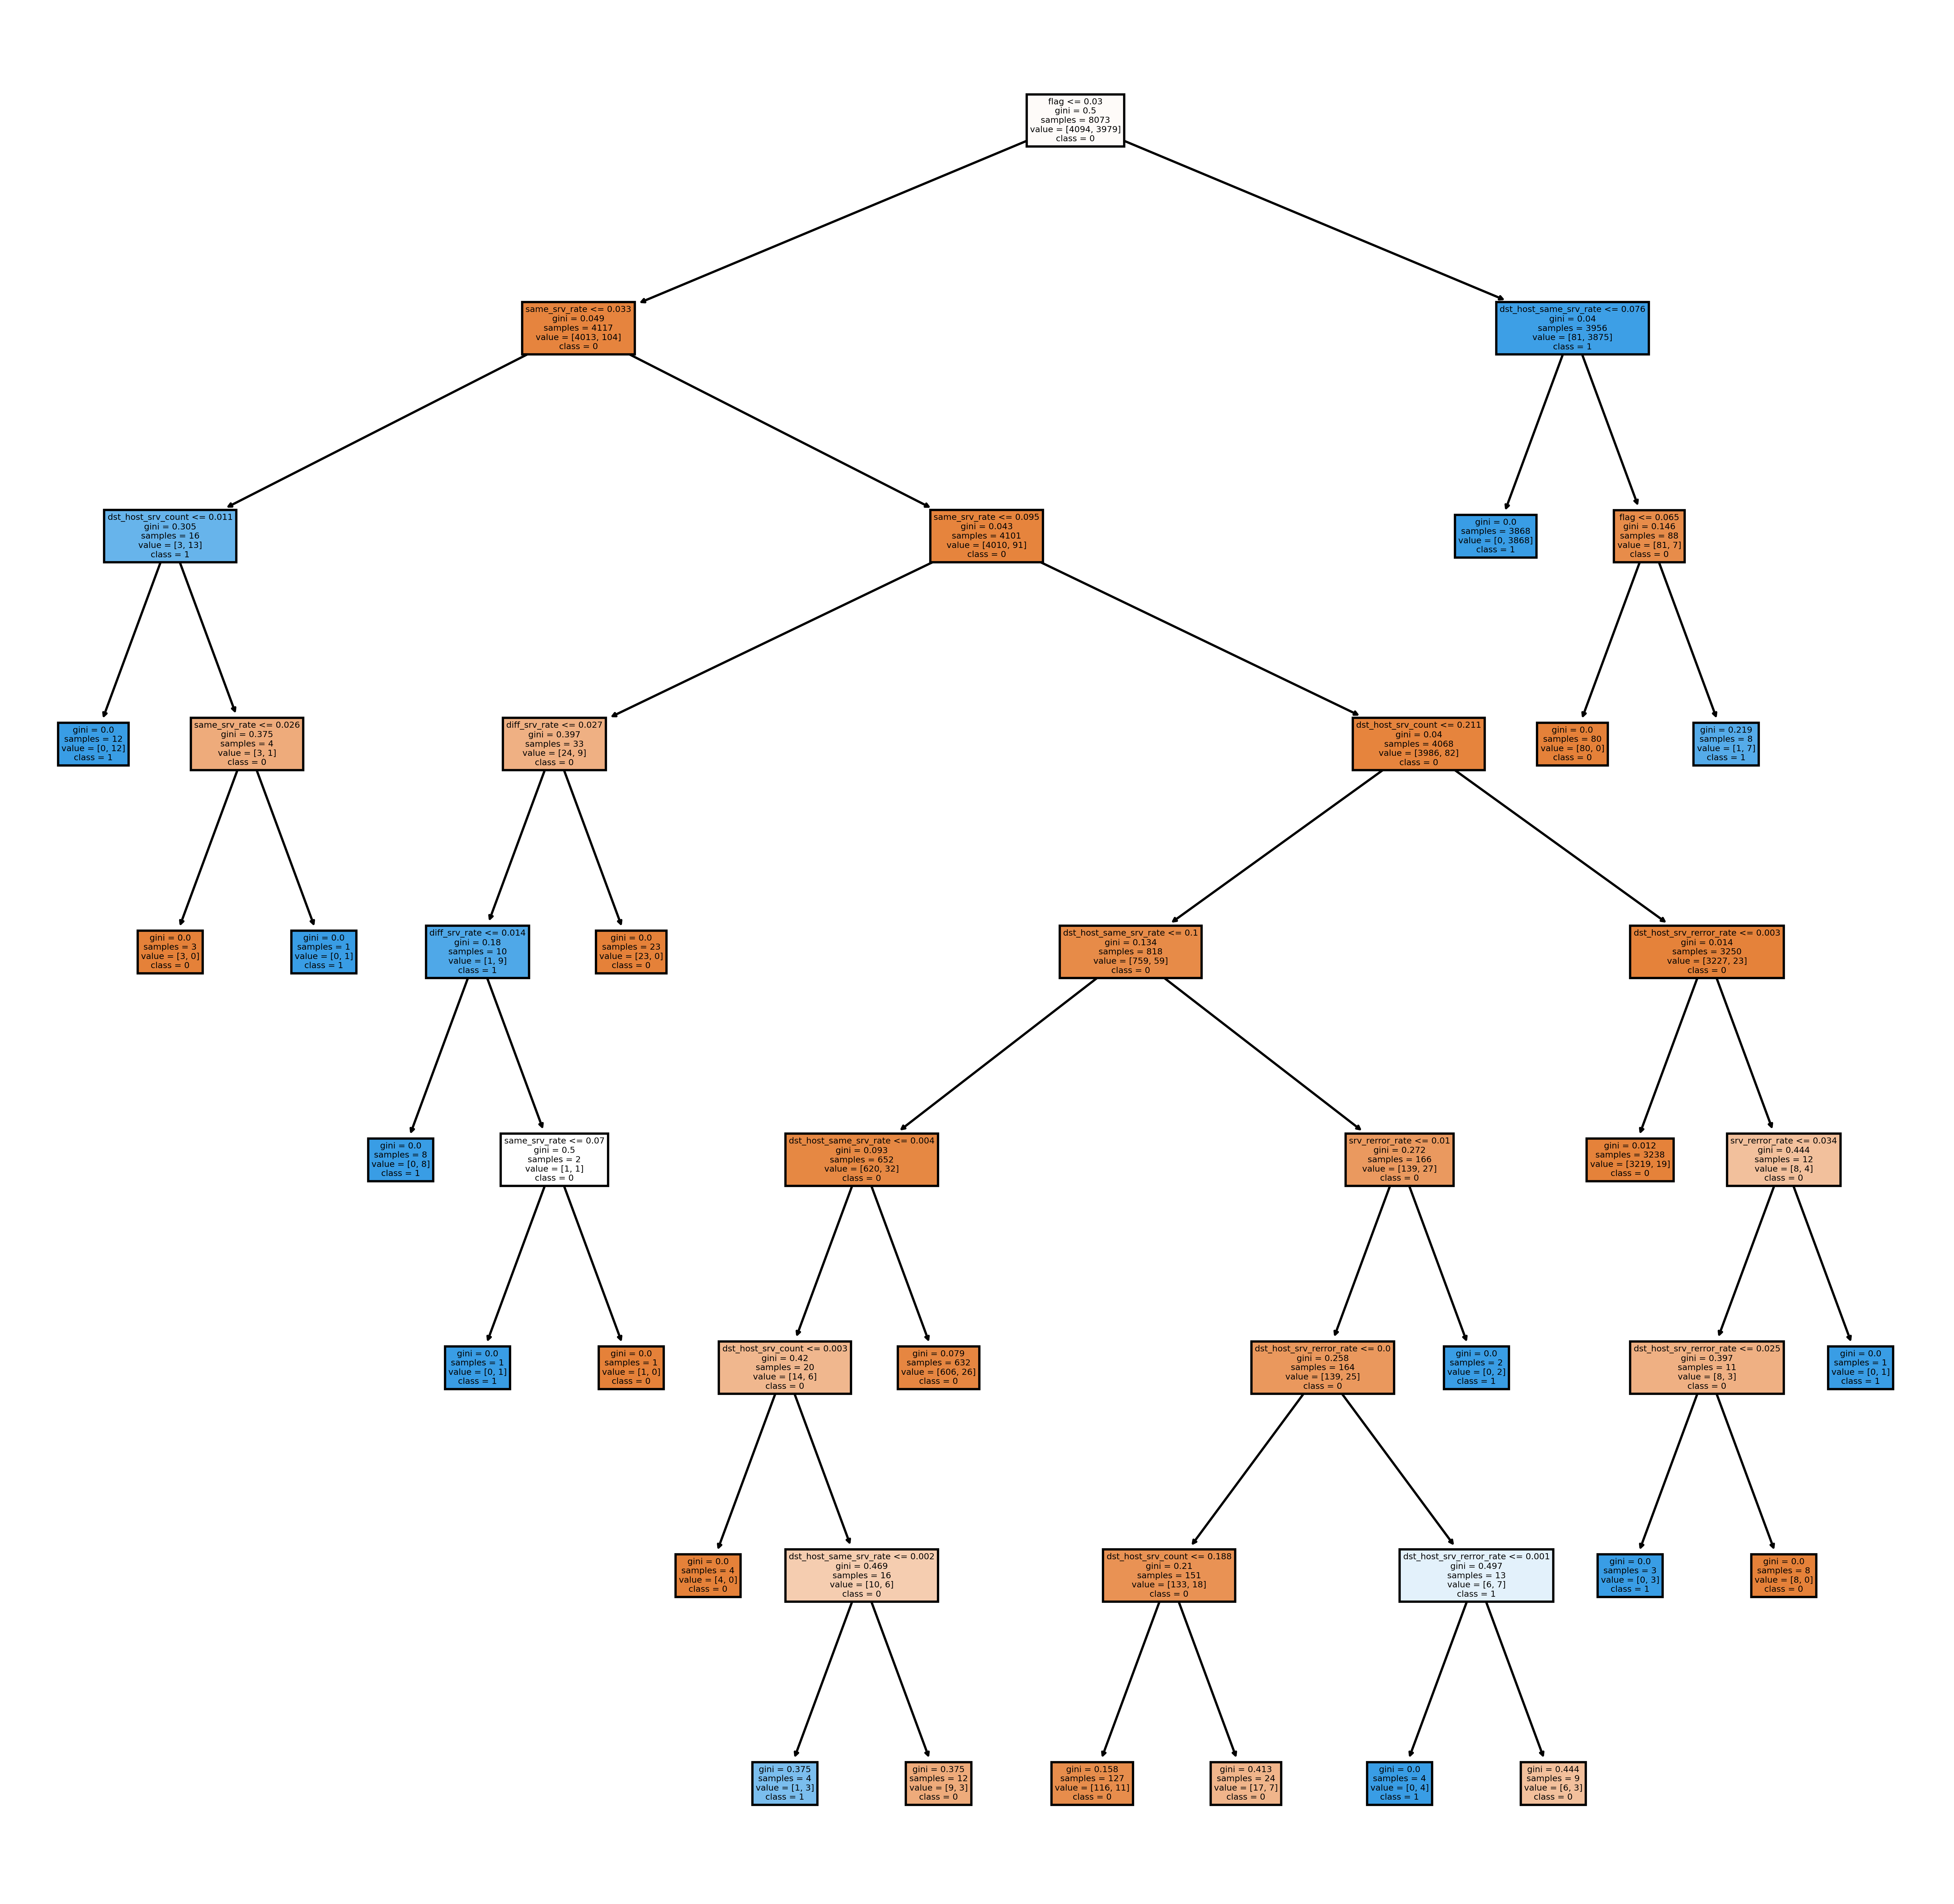

In [51]:
fig, axes = plt.subplots(nrows = 1 , ncols = 1, figsize =(15,15), dpi=600)
xx=tree.plot_tree(model,feature_names=x.columns,class_names="01",filled=True);

## xgboost

In [52]:
from xgboost import XGBClassifier

from xgboost import plot_tree

In [53]:
import graphviz as graphviz

In [54]:
xgb_estimator = XGBClassifier(random_state = 42)

In [55]:
model=xgb_estimator.fit(train_x, train_y)

In [56]:
import xgboost as xgb
image= xgb.to_graphviz(model)
image.render('Xgbtree',format="pdf")


'Xgbtree.pdf'

In [57]:
#Train data - AUC Score
print(metrics.roc_auc_score(train_y, pd.DataFrame(xgb_estimator.predict_proba(train_x))[1]))

#Test data - AUC Score
print(metrics.roc_auc_score(test_y, pd.DataFrame(xgb_estimator.predict_proba(test_x))[1]))

0.9979197393546211
0.9940369331463302


## Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
param_grid = {'n_estimators': [50, 60, 70, 80, 90, 100],'max_features': [2,3,4,5,6,7,8,9],'max_depth': [2,3,4,5,6,7,8,9]}

In [60]:
model = GridSearchCV(RandomForestClassifier(), param_grid,scoring='f1', cv=5, n_jobs=-1, verbose=True)

In [61]:
model.fit(train_x, train_y)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='f1', verbose=True)

In [62]:
model.best_score_

0.9893489275142043

In [63]:
model.best_params_

{'max_depth': 9, 'max_features': 7, 'n_estimators': 50}

In [65]:
model = RandomForestClassifier(n_estimators=50 , max_depth = 9, max_features=7, n_jobs=-1)
model.fit( train_x, train_y )

RandomForestClassifier(max_depth=9, max_features=7, n_estimators=50, n_jobs=-1)

In [79]:
cm=confusion_matrix(test_y.values,model.predict(test_x))

<AxesSubplot:>

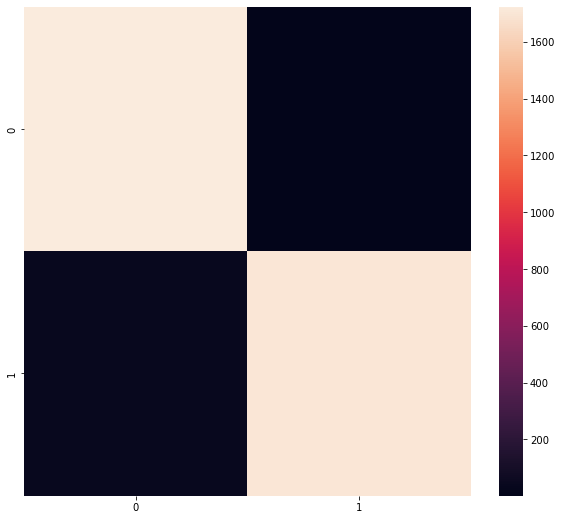

In [82]:
plt.figure(figsize=[10,9])
sns.heatmap(cm)

In [66]:
#Train data - AUC Score
print(metrics.roc_auc_score(train_y, pd.DataFrame(model.predict_proba(train_x))[1]))

#Test data - AUC Score
print(metrics.roc_auc_score(test_y, pd.DataFrame(model.predict_proba(test_x))[1]))

0.9976116367156196
0.995002337540907


In [67]:
train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

In [68]:
print(metrics.classification_report(train_y, train_pred))
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4094
           1       1.00      0.98      0.99      3979

    accuracy                           0.99      8073
   macro avg       0.99      0.99      0.99      8073
weighted avg       0.99      0.99      0.99      8073

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1725
           1       1.00      0.98      0.99      1736

    accuracy                           0.99      3461
   macro avg       0.99      0.99      0.99      3461
weighted avg       0.99      0.99      0.99      3461



# Mulitinominal Classification


In [83]:
multi=final.drop(columns=["binary_flag"])

In [84]:
multi["attack_flag"]=np.where(multi.attack=="back",0,np.where(multi.attack=="Back_FTPWrite",1,np.where(multi.attack=="BufferOverflow",2,
                     np.where(multi.attack=="GuessPassword",3,np.where(multi.attack=="Neptune",4,np.where(multi.attack=="NMap",5,
                     np.where(multi.attack=="Normal",6,np.where(multi.attack=="PortSweep",7,np.where(multi.attack=="RootKit",8,
                     np.where(multi.attack=="Satan",9,10))))))))))

In [85]:
multi.drop(columns=["attack"],inplace=True)

In [86]:
multi

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0          0.0           0.00     0.00   0.0    0.07012    0.08314     0   
1          0.0           0.00     0.00   0.0    0.07012    0.08314     0   
2          0.0           0.00     0.00   0.0    0.07012    0.08314     0   
3          0.0           0.00     0.00   0.0    0.07012    0.08314     0   
4          0.0           0.00     0.00   0.0    0.07012    0.08314     0   
...        ...            ...      ...   ...        ...        ...   ...   
3002       0.0           0.01     0.09   0.0    0.01032    0.00000     0   
3003       0.0           0.01     0.09   0.0    0.01032    0.00000     0   
3004       0.0           0.01     0.09   0.0    0.01032    0.00000     0   
3005       0.0           0.01     0.09   0.0    0.01032    0.00000     0   
3006       0.0           0.01     0.12   0.0    0.00028    0.00000     0   

      wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                0.0     0.0  0.0  ...               0.001   
1                0.0     0.0  0.0  ...               0.002   
2                0.0     0.0  0.0  ...               0.003   
3                0.0     0.0  0.0  ...               0.004   
4                0.0     0.0  0.0  ...               0.005   
...              ...     ...  ...  ...                 ...   
3002             0.0     0.0  0.0  ...               0.251   
3003             0.0     0.0  0.0  ...               0.252   
3004             0.0     0.0  0.0  ...               0.253   
3005             0.0     0.0  0.0  ...               0.254   
3006             0.0     0.0  0.0  ...               0.001   

      dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                      0.100                   0.000   
1                      0.100                   0.000   
2                      0.100                   0.000   
3                      0.100                   0.000   
4                      0.100                   0.000   
...                      ...                     ...   
3002                   0.098                   0.001   
3003                   0.099                   0.001   
3004                   0.099                   0.001   
3005                   0.100                   0.001   
3006                   0.000                   0.001   

      dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                           0.100                          0.0   
1                           0.050                          0.0   
2                           0.033                          0.0   
3                           0.025                          0.0   
4                           0.020                          0.0   
...                           ...                          ...   
3002                        0.098                          0.0   
3003                        0.099                          0.0   
3004                        0.099                          0.0   
3005                        0.100                          0.0   
3006                        0.000                          0.0   

      dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                      0.0                       0.0                   0.0   
1                      0.0                       0.0                   0.0   
2                      0.0                       0.0                   0.0   
3                      0.0                       0.0                   0.0   
4                      0.0                       0.0                   0.0   
...                    ...                       ...                   ...   
3002                   0.0                       0.0                   0.0   
3003                   0.0                       0.0                   0.0   
3004                   0.0                       0.0                   0.0   
3005                   0.0                       0.0                   0.0   
3006                   0

In [87]:
y=multi["attack_flag"]

In [88]:
x=multi.drop(columns=["attack_flag"])

In [89]:
x

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0          0.0           0.00     0.00   0.0    0.07012    0.08314     0   
1          0.0           0.00     0.00   0.0    0.07012    0.08314     0   
2          0.0           0.00     0.00   0.0    0.07012    0.08314     0   
3          0.0           0.00     0.00   0.0    0.07012    0.08314     0   
4          0.0           0.00     0.00   0.0    0.07012    0.08314     0   
...        ...            ...      ...   ...        ...        ...   ...   
3002       0.0           0.01     0.09   0.0    0.01032    0.00000     0   
3003       0.0           0.01     0.09   0.0    0.01032    0.00000     0   
3004       0.0           0.01     0.09   0.0    0.01032    0.00000     0   
3005       0.0           0.01     0.09   0.0    0.01032    0.00000     0   
3006       0.0           0.01     0.12   0.0    0.00028    0.00000     0   

      wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0                0.0     0.0  0.0  ...           0.001               0.001   
1                0.0     0.0  0.0  ...           0.002               0.002   
2                0.0     0.0  0.0  ...           0.003               0.003   
3                0.0     0.0  0.0  ...           0.004               0.004   
4                0.0     0.0  0.0  ...           0.005               0.005   
...              ...     ...  ...  ...             ...                 ...   
3002             0.0     0.0  0.0  ...           0.255               0.251   
3003             0.0     0.0  0.0  ...           0.255               0.252   
3004             0.0     0.0  0.0  ...           0.255               0.253   
3005             0.0     0.0  0.0  ...           0.255               0.254   
3006             0.0     0.0  0.0  ...           0.255               0.001   

      dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                      0.100                   0.000   
1                      0.100                   0.000   
2                      0.100                   0.000   
3                      0.100                   0.000   
4                      0.100                   0.000   
...                      ...                     ...   
3002                   0.098                   0.001   
3003                   0.099                   0.001   
3004                   0.099                   0.001   
3005                   0.100                   0.001   
3006                   0.000                   0.001   

      dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                           0.100                          0.0   
1                           0.050                          0.0   
2                           0.033                          0.0   
3                           0.025                          0.0   
4                           0.020                          0.0   
...                           ...                          ...   
3002                        0.098                          0.0   
3003                        0.099                          0.0   
3004                        0.099                          0.0   
3005                        0.100                          0.0   
3006                        0.000                          0.0   

      dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                      0.0                       0.0                   0.0   
1                      0.0                       0.0                   0.0   
2                      0.0                       0.0                   0.0   
3                      0.0                       0.0                   0.0   
4                      0.0                       0.0                   0.0   
...                    ...                       ...                   ...   
3002                   0.0                       0.0                   0.0   
3003                   0.0                       0.0              

In [ ]:
#import imblearn.over_sampling as over_sampling

In [90]:
from imblearn.over_sampling import RandomOverSampler

In [91]:
smf = RandomOverSampler(random_state=123)
x, y = smf.fit_resample(x,y)

In [92]:
y=y.sample(frac=.01)
x=x.loc[y.index]

## Feature Engineering

In [93]:
from sklearn.feature_selection import SelectKBest, f_classif

In [94]:
SKB = SelectKBest(f_classif,k=12).fit(x,y)
x.columns[SKB.get_support()].values

C:\Users\Asus1\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning:

Features [ 6  7  8  9 10 12 13 14 15 16 17 18 19 20 21] are constant.

C:\Users\Asus1\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning:

invalid value encountered in true_divide



array(['flag', 'src_bytes', 'logged_in', 'srv_count', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'dst_host_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'], dtype=object)

In [95]:
x=x[['flag', 'src_bytes', 'logged_in', 'srv_count', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'dst_host_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']]

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=1234)

In [106]:
X_test

flag  src_bytes  logged_in  srv_count  rerror_rate  srv_rerror_rate  \
4359180  0.05    0.00000        0.0      0.001          0.1              0.1   
48815    0.07    0.00000        0.0      0.012          0.0              0.0   
1098372  0.00    0.07012        0.1      0.002          0.0              0.0   
5124637  0.00    0.00089        0.1      0.001          0.0              0.0   
4556330  0.05    0.00000        0.0      0.001          0.1              0.1   
...       ...        ...        ...        ...          ...              ...   
5002602  0.00    0.00004        0.0      0.001          0.0              0.0   
2809472  0.06    0.00126        0.0      0.001          0.1              0.1   
1515535  0.00    0.00157        0.1      0.001          0.0              0.0   
1379530  0.00    0.07012        0.1      0.005          0.0              0.0   
5370943  0.00    0.00010        0.1      0.001          0.0              0.0   

         same_srv_rate  dst_host_count  dst_host_same_srv_rate  \
4359180          0.011           0.179                   0.001   
48815            0.011           0.255                   0.005   
1098372          0.100           0.153                   0.100   
5124637          0.100           0.255                   0.000   
4556330          0.050           0.250                   0.000   
...                ...             ...                     ...   
5002602          0.100           0.001                   0.100   
2809472          0.100           0.015                   0.100   
1515535          0.100           0.002                   0.050   
1379530          0.100           0.255                   0.100   
5370943          0.050           0.007                   0.029   

         dst_host_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  
4359180                 0.001                 0.032                     0.100  
48815                   0.100                 0.000                     0.000  
1098372                 0.000                 0.001                     0.001  
5124637                 0.000                 0.000                     0.000  
4556330                 0.000                 0.010                     0.100  
...                       ...                   ...                       ...  
5002602                 0.000                 0.000                     0.000  
2809472                 0.007                 0.093                     0.093  
1515535                 0.000                 0.000                     0.000  
1379530                 0.000                 0.004                     0.004  
5370943                 0.000                 0.000                     0.000  

[19032 rows x 12 columns]

## logistic regression

In [105]:
from sklearn.linear_model import LogisticRegression

In [100]:
model=LogisticRegression(max_iter=10000,n_jobs=-1)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000, n_jobs=-1)

In [101]:
print(model.score(X_train,y_train))

0.8095978020988155


In [102]:
print(model.score(X_test,y_test))

0.8066939890710383


## XGBOOST

In [108]:
yy=multi["attack_flag"]
xx=multi.drop(columns=["attack_flag"])

In [109]:
from imblearn.over_sampling import RandomOverSampler

In [110]:
smf = RandomOverSampler(random_state=123)
x, y = smf.fit_resample(xx,yy)

In [111]:
y=y.sample(frac=.01)
x=x.loc[y.index]

In [112]:
x

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
6012336    0.0000           0.01     0.09   0.0    0.00520   0.000000     0   
1802169    0.0015           0.00     0.07   0.0    0.00104   0.004490     0   
1820701    0.0015           0.00     0.34   0.0    0.00100   0.309345     0   
4739128    0.0015           0.00     0.07   0.0    0.00089   0.003450     0   
4855979    0.0015           0.00     0.07   0.0    0.00089   0.003450     0   
...           ...            ...      ...   ...        ...        ...   ...   
5837982    0.0000           0.01     0.09   0.0    0.00520   0.000000     0   
5037349    0.0000           0.01     0.10   0.0    0.00004   0.000000     0   
4039705    0.0000           0.01     0.06   0.0    0.00008   0.000000     0   
5231868    0.0000           0.01     0.12   0.0    0.00001   0.000000     0   
1952611    0.0015           0.00     0.07   0.0    0.00104   0.004490     0   

         wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
6012336             0.0     0.0  0.0  ...           0.255               0.255   
1802169             0.0     0.0  0.0  ...           0.001               0.001   
1820701             0.0     0.0  0.0  ...           0.002               0.001   
4739128             0.0     0.0  0.0  ...           0.255               0.001   
4855979             0.0     0.0  0.0  ...           0.255               0.001   
...                 ...     ...  ...  ...             ...                 ...   
5837982             0.0     0.0  0.0  ...           0.066               0.066   
5037349             0.0     0.0  0.0  ...           0.002               0.002   
4039705             0.0     0.0  0.0  ...           0.001               0.149   
5231868             0.0     0.0  0.0  ...           0.255               0.002   
1952611             0.0     0.0  0.0  ...           0.001               0.001   

         dst_host_same_srv_rate  dst_host_diff_srv_rate  \
6012336                   0.100                   0.000   
1802169                   0.100                   0.000   
1820701                   0.050                   0.040   
4739128                   0.000                   0.002   
4855979                   0.000                   0.002   
...                         ...                     ...   
5837982                   0.100                   0.000   
5037349                   0.100                   0.000   
4039705                   0.100                   0.000   
5231868                   0.001                   0.029   
1952611                   0.100                   0.000   

         dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
6012336                         0.10                        0.000   
1802169                         0.10                        0.000   
1820701                         0.05                        0.000   
4739128                         0.00                        0.000   
4855979                         0.00                        0.000   
...                              ...                          ...   
5837982                         0.10                        0.000   
5037349                         0.05                        0.000   
4039705                         0.10                        0.018   
5231868                         0.10                        0.000   
1952611                         0.10                        0.000   

         dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
6012336                   0.0                       0.0                   0.0   
1802169                   0.0                       0.0                   0.0   
1820701                   0.0                       0.0                   0.0   
4739128                   0.0                       0.0                   0.0   
4855979                   0.0                       0.0                   0.0   
...                       ...                       ...        

In [113]:
from xgboost import XGBClassifier

In [114]:
xgb_estimator = XGBClassifier(random_state = 42)

In [115]:
train_x,test_x,train_y,test_y = train_test_split(x, y, test_size = 0.3,random_state=12)

In [116]:
test_x

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
4615465    0.0000           0.00     0.12  0.07    0.00000   0.000000     0   
1700172    0.0015           0.00     0.07  0.00    0.00116   0.004510     0   
2224592    0.0000           0.00     0.14  0.00    0.00000   0.058280     0   
5615095    0.0000           0.00     0.10  0.05    0.00000   0.000000     0   
1439067    0.0000           0.00     0.14  0.00    0.00676   0.000000     0   
...           ...            ...      ...   ...        ...        ...   ...   
5724928    0.0000           0.00     0.10  0.05    0.00000   0.000000     0   
449915     0.0000           0.00     0.00  0.00    0.00302   0.309345     0   
2812576    0.0000           0.00     0.05  0.06    0.00125   0.001790     0   
6238610    0.0000           0.01     0.09  0.00    0.01032   0.000000     0   
2530442    0.0000           0.00     0.14  0.00    0.00000   0.056900     0   

         wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
4615465             0.0     0.0  0.0  ...           0.213               0.001   
1700172             0.0     0.0  0.0  ...           0.001               0.001   
2224592             0.0     0.0  0.0  ...           0.002               0.002   
5615095             0.0     0.0  0.0  ...           0.255               0.001   
1439067             0.0     0.0  0.0  ...           0.001               0.004   
...                 ...     ...  ...  ...             ...                 ...   
5724928             0.0     0.0  0.0  ...           0.255               0.001   
449915              0.0     0.0  0.0  ...           0.255               0.255   
2812576             0.0     0.0  0.0  ...           0.002               0.002   
6238610             0.0     0.0  0.0  ...           0.255               0.010   
2530442             0.0     0.0  0.0  ...           0.001               0.001   

         dst_host_same_srv_rate  dst_host_diff_srv_rate  \
4615465                   0.000                   0.023   
1700172                   0.100                   0.000   
2224592                   0.100                   0.000   
5615095                   0.000                   0.040   
1439067                   0.100                   0.000   
...                         ...                     ...   
5724928                   0.000                   0.040   
449915                    0.100                   0.000   
2812576                   0.100                   0.000   
6238610                   0.004                   0.018   
2530442                   0.100                   0.000   

         dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
4615465                        0.044                        0.000   
1700172                        0.100                        0.000   
2224592                        0.100                        0.000   
5615095                        0.000                        0.000   
1439067                        0.100                        0.018   
...                              ...                          ...   
5724928                        0.000                        0.000   
449915                         0.000                        0.000   
2812576                        0.050                        0.000   
6238610                        0.004                        0.000   
2530442                        0.100                        0.000   

         dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
4615465                 0.000                     0.000                 0.044   
1700172                 0.000                     0.000                 0.000   
2224592                 0.000                     0.000                 0.000   
5615095                 0.027                     0.000                 0.073   
1439067                 0.000                     0.000                 0.000   
...                       ...                       ...        

In [117]:
xgb_estimator =  xgb_estimator.fit(train_x, train_y)

In [128]:
model1=xgb_estimator.predict(train_x)

In [138]:
metrics.accuracy_score(model1,train_y)

1.0

In [135]:
model2=xgb_estimator.predict(test_x)

In [137]:
metrics.accuracy_score(model2,test_y)

0.9993694829760403

In [118]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4076
           1       1.00      1.00      1.00      3983
           2       1.00      1.00      1.00      4029
           3       1.00      1.00      1.00      4092
           4       1.00      1.00      1.00      4090
           5       1.00      1.00      1.00      3951
           6       1.00      1.00      1.00      4058
           7       1.00      1.00      1.00      3962
           8       1.00      1.00      1.00      4026
           9       1.00      1.00      1.00      4001
          10       1.00      1.00      1.00      4138

    accuracy                           1.00     44406
   macro avg       1.00      1.00      1.00     44406
weighted avg       1.00      1.00      1.00     44406



In [119]:
print(metrics.classification_report(test_y, xgb_estimator.predict(test_x)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1762
           1       1.00      1.00      1.00      1794
           2       1.00      1.00      1.00      1756
           3       1.00      1.00      1.00      1738
           4       1.00      1.00      1.00      1680
           5       1.00      1.00      1.00      1709
           6       1.00      1.00      1.00      1750
           7       1.00      1.00      1.00      1730
           8       1.00      1.00      1.00      1712
           9       1.00      1.00      1.00      1723
          10       1.00      1.00      1.00      1678

    accuracy                           1.00     19032
   macro avg       1.00      1.00      1.00     19032
weighted avg       1.00      1.00      1.00     19032



# Random Forest

In [139]:
param_grid = {'n_estimators': [50, 60, 70, 80,],'max_features': [2,3,4,5,6,7],'max_depth': [2,3,4,5,6]}

In [140]:
model = GridSearchCV(RandomForestClassifier(), param_grid,scoring='roc_auc', cv=5, n_jobs=-1, verbose=True)
model.fit(train_x,train_y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\Asus1\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]



GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [50, 60, 70, 80]},
             scoring='roc_auc', verbose=True)

In [141]:
model.best_params_

{'max_depth': 2, 'max_features': 2, 'n_estimators': 50}

In [142]:
model = RandomForestClassifier(n_estimators=50 , max_depth = 2, max_features=2, n_jobs=-1)
model.fit( train_x, train_y )

RandomForestClassifier(max_depth=2, max_features=2, n_estimators=50, n_jobs=-1)

In [144]:
model3=model.predict(train_x)
metrics.accuracy_score(model3,train_y)

0.8599513579246048

In [145]:
model4=model.predict(test_x)
metrics.accuracy_score(model4,test_y)

0.8569777217318201

In [148]:
cm=confusion_matrix(test_y.values,model.predict(test_x))

<AxesSubplot:>

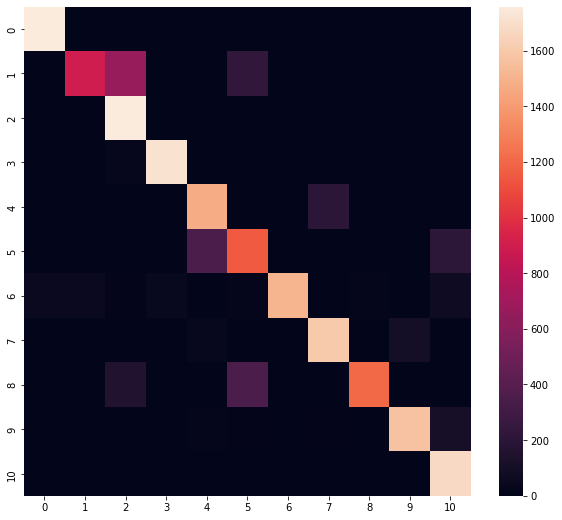

In [149]:
plt.figure(figsize=[10,9])
sns.heatmap(cm)

In [147]:
print(metrics.classification_report(train_y, model3))
print(metrics.classification_report(test_y, model4))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4076
           1       0.96      0.49      0.65      3983
           2       0.67      1.00      0.80      4029
           3       0.98      0.98      0.98      4092
           4       0.81      0.88      0.85      4090
           5       0.66      0.69      0.68      3951
           6       1.00      0.88      0.93      4058
           7       0.88      0.93      0.90      3962
           8       0.97      0.70      0.81      4026
           9       0.95      0.90      0.92      4001
          10       0.82      1.00      0.90      4138

    accuracy                           0.86     44406
   macro avg       0.88      0.86      0.86     44406
weighted avg       0.88      0.86      0.86     44406

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1762
           1       0.95      0.50      0.66      1794
           2       0.67 